<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2024/blob/master/07_misophonia_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7 - Misophonia (First part)
> Misophonia is a recently described neurological condition whereby patients feel strong anxiety when hearing particular noises (someone blowing their nose, mobile ringing, trains passing, etc..). It is believed that 5% of the population suffers from this condition without knowing it, likely blaming their anxiety on other causes.

The misophonia dataset is from a recent (unpublished) study that aimed to describe the relationships between misophonia and anxiety, depression, and cephalometric measures (shape of the jaw).

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading

Let's begin again by loading Pandas with the `pd` alias and by importing the misophonia dataset `misophonia_data.xlsx` from the `/MMRES-python-bootcamp2022/datasets` sub-folder:

In [2]:
# Load package with its corresponding alias
import pandas as pd

# Reading an Excel SpreadSheet and storing it in as a DataFrame called `df`
# df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')

# Return the DataFrame
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


<div class="alert alert-block alert-warning"><b>Extension:</b>

We can load data from different file formats. Export the current dataset as a *.csv file, or as a *.tsv file and load it again using the proper function. You will have to find them in the documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
</div>

<div class="alert alert-block alert-info"><b>Tip:</b>
Uncomment the following cell to have an example
</div>

In [3]:

#df = pd.read_csv('https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/main/datasets/misophoinia_data.mod.csv', sep=',', na_values="NA")
#df


### Data description

Here is the description of the variables

[1] “Misofonia”: Binary (si: misophinic, no: no misophinic)

[2] “Misofonia.dic”: Categorical (0: no misophinic, 1: severity 1, 2: severity 2, 3: severity 3, 4: severity 4)

[3] “Estado”: Marital status (casado: married, soltero: single, viuda: widow, divorciado:divorced)

[4] “Estado.dic”: Numeric Marital status

[5] “ansiedad.rasgo”: Score from 0-100 with anxiety personality trait

[6] “ansiedad.rasgo.dic”: Binary score (0,1) of anxiety personality trait

[7] “ansiedad.estado”: Score from 0-100 with current state of anxiety

[8] “ansiedad.estado.dic”: Binary score (0,1) with current state of anxiety

[9] “ansiedad.medicada”: Diagnosed with anxiety disorder (si, no)

[10] “ansiedad.medicada.dic”: Diagnosed with anxiety disorder (1, 0)

[11] “depresion”: Score from 0-50 with current state of depression

[12] “depresion.dic” : Binary score (0,1) with current state of depression

[13] “Sexo”: Male=H, Female:M

[14] “Edad”: Age

[15] “CLASE”: Type of jaw

[16] “Angulo_convexidad”: convexity angle

[17] “protusion.mandibular”: Projection of the jaw [18] “Angulo_cuelloYtercio”: angle between jaw and neck [19] “Subnasal_H”: Nasal angle

[20] “cambio.autoconcepto”: Whether people changed their self-concept after treatment.

[21] “Misofonia.post”: Misophionia diagnosed (A-MISO) after an educational program, where patients were made aware of a condition called misophonia.

[22] “Misofonia.pre”: Misophionia diagnosed (A-MISO) before an educational program, where patients were made aware of a condition called misophonia

[23] “ansiedad.dif”: Difference between anxiety state and anxiety trait scores

<br><br>

When reporting the results of a study, we first describe the variables of interest in tables and figures.

We describe demographics (sex, age, marital status, etc..)

We describe outcome variables (misophonia)

### 1. Descriptive statistics of explanatory variables


We describe explanatory variables such as cephalometric measures, anxiety, depression, etc.


<div class="alert alert-block alert-success"><b>Practice:</b>

Imagine we want to study the anxiety of participants in the misophonia study. Once loaded the data, describe the participants’ sex, age and marital status.
</div>


In [4]:
# Count the numnber of occurences of each value in a categorical variable
from collections import Counter
print(Counter(df['Sexo']))


Counter({'M': 78, 'H': 45, nan: 15})


In [5]:

# this is the same using pandas
df.groupby('Sexo').size()


,0
Sexo,
H,45
M,78


In [6]:
# this way we can get the percentages
df['Sexo'].value_counts(normalize=True) * 100

,proportion
Sexo,
M,63.414634
H,36.585366


Text(0, 0.5, 'Percentage')

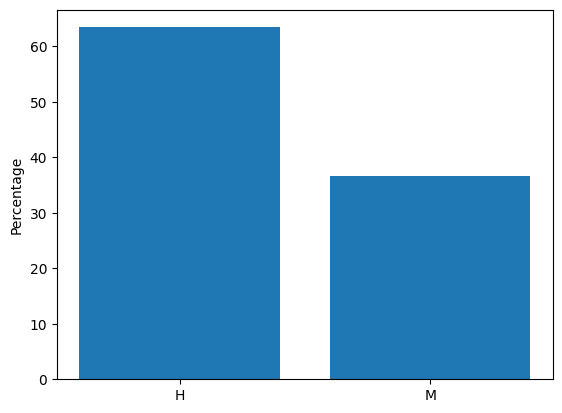

In [7]:
# plot the percentage using matplotlib

fig, ax = plt.subplots()
ax.bar([0,1],df['Sexo'].value_counts(normalize=True) * 100)
ax.set_xticks([0,1])
ax.set_xticklabels(['H','M'])
ax.set_ylabel('Percentage')

<Axes: xlabel='Sexo', ylabel='count'>

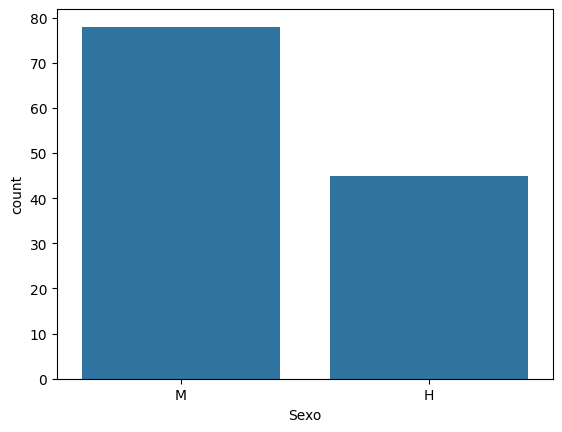

In [8]:
# plot the counts using seaborn
fig, ax = plt.subplots()
sns.countplot(data=df,x='Sexo')

In [9]:
#mean with pandas
df['Edad'].mean()

43.9349593495935

In [10]:
#mean with numpy
np.mean(df['Edad'])

43.9349593495935

In [11]:
#standard deviation with numpy
np.std(df['Edad'])

14.128757410825528

In [12]:
#standard deviation with pandas
df['Edad'].std()

14.186543980874442

In [13]:
df['Edad'].describe()


,Edad
count,123.000000
mean,43.934959
std,14.186544
min,13.000000
25%,34.000000
50%,43.000000
75%,53.000000
max,86.000000


<div class="alert alert-block alert-success"><b>Practice:</b>

Try to obtain the descriptive statistics shown above with the individual functions of numpy and/or pandas.

</div>

<ipython-input-14-730e89071bf3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Edad'])


<Axes: xlabel='Edad', ylabel='Density'>

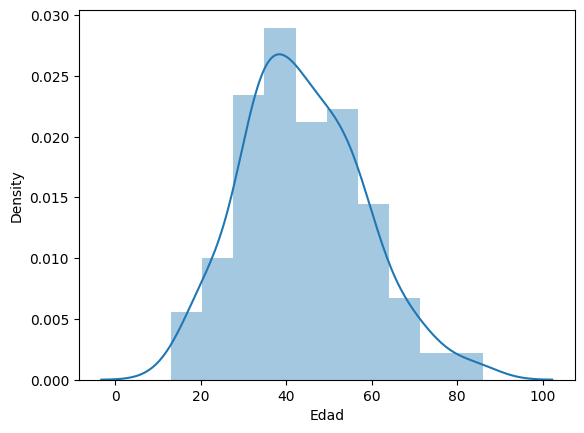

In [14]:
# histogram
sns.distplot(df['Edad'])

<Axes: ylabel='Edad'>

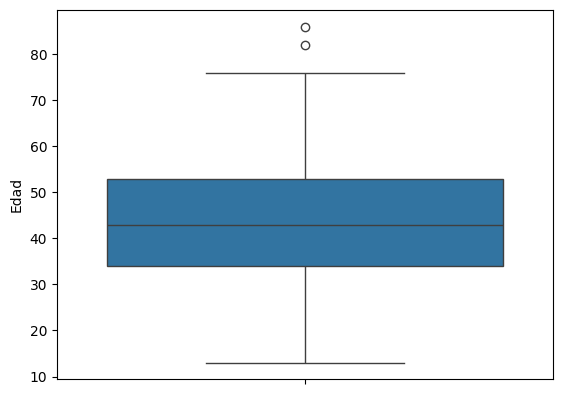

In [15]:
sns.boxplot(y=df['Edad'])

<Axes: ylabel='Edad'>

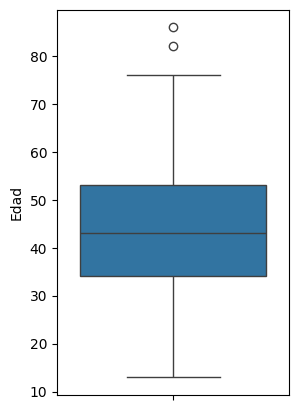

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, y='Edad',ax=ax)

In [17]:
# Age by sex
maleage = df[df['Sexo']=="H"]['Edad']
femaleage = df[df['Sexo']=="M"]['Edad']
print('male age\n',maleage.describe())
print('female age\n',femaleage.describe())

male age
 count    45.000000
mean     40.644444
std      10.751650
min      19.000000
25%      34.000000
50%      41.000000
75%      48.000000
max      69.000000
Name: Edad, dtype: float64
female age
 count    78.000000
mean     45.833333
std      15.583388
min      13.000000
25%      33.250000
50%      44.000000
75%      56.500000
max      86.000000
Name: Edad, dtype: float64


<Axes: xlabel='Sexo', ylabel='Edad'>

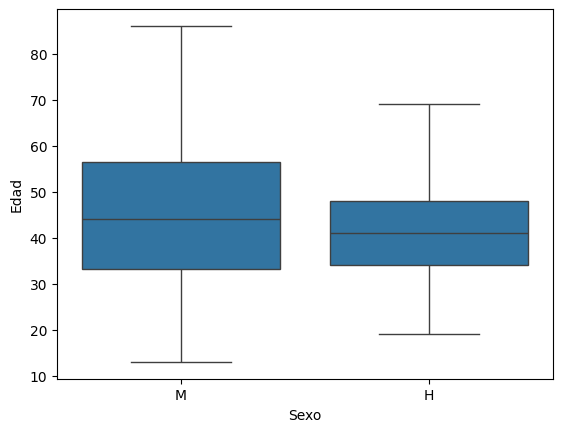

In [18]:
sns.boxplot(data=df,y='Edad', x='Sexo')

In [19]:
# Marital status:
maritaldf=df['Estado'].value_counts(normalize=True) * 100
maritaldf

,proportion
Estado,
casado,52.032520
soltero,23.577236
divorciado,21.138211
viuda,3.252033


([<matplotlib.patches.Wedge at 0x7c858c7d2e30>,
 [Text(-0.07019107254860582, 1.097758267258542, 'casado'),
  Text(-0.710647131726074, -0.839631260833888, 'soltero'),
  Text(0.7106469351961745, -0.8396314271728307, 'divorciado'),
  Text(1.094264184572779, -0.11218687249973228, 'viuda')])

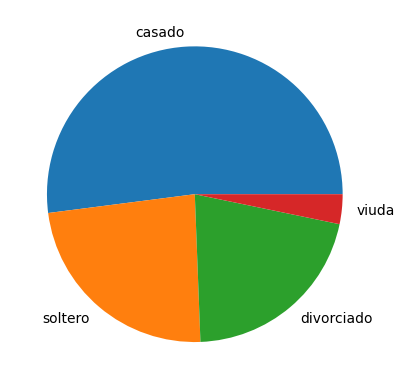

In [20]:
plt.pie(maritaldf,labels=maritaldf.index)

### 2. Descriptive statistics of clinical outcome

We have four measures of anxiety:
<ul>
  <li> ansiedad.rasgo (are you an anxious person?) continuous:0-100 </li>
  <li> ansiedad.estado (are you currently feeling anxious?) continuous:0-100 </li>
  <li> ansiedad.medicada (have you been diagnosed with an anxiety disorder?) binary (si, no) </li>
  <li> ansiedad.dif (difference between ansiedad.estado and ansiedad.rasgo) </li>
</ul>

#### Anxiety trait
are you an anxious person?
continuous:0-100

In [21]:
df['ansiedad.rasgo'].describe()

,ansiedad.rasgo
count,123.000000
mean,68.772358
std,29.044571
min,1.000000
25%,60.000000
50%,80.000000
75%,89.000000
max,99.000000


<ipython-input-22-25e43784b4f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ansiedad.rasgo'])


<Axes: xlabel='ansiedad.rasgo', ylabel='Density'>

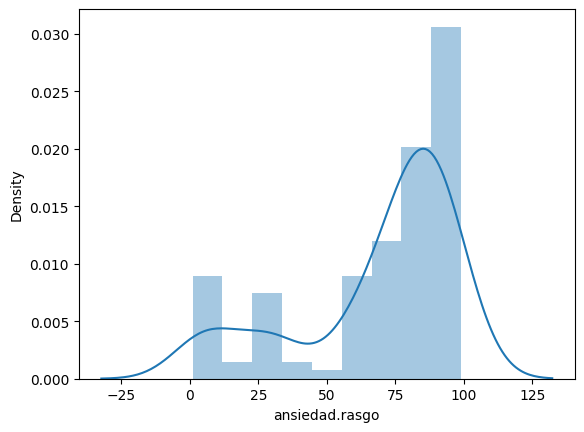

In [22]:
sns.distplot(df['ansiedad.rasgo'])

<Axes: ylabel='ansiedad.rasgo'>

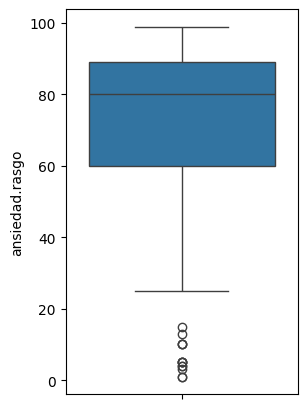

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df,y='ansiedad.rasgo',ax=ax)

#### Anxiety state
are you currently feeling anxious?
*continuous*:0-100

In [24]:
df['ansiedad.estado'].describe()

,ansiedad.estado
count,123.000000
mean,67.853659
std,29.664706
min,1.000000
25%,45.000000
50%,77.000000
75%,90.000000
max,99.000000


<ipython-input-25-d8a80715beb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ansiedad.estado'])


<Axes: xlabel='ansiedad.estado', ylabel='Density'>

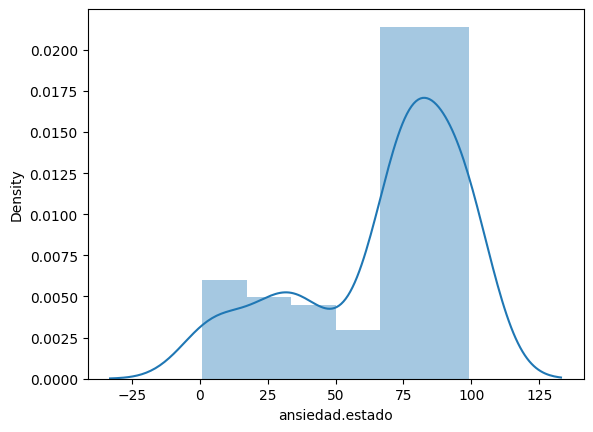

In [25]:
sns.distplot(df['ansiedad.estado'])

<Axes: ylabel='ansiedad.estado'>

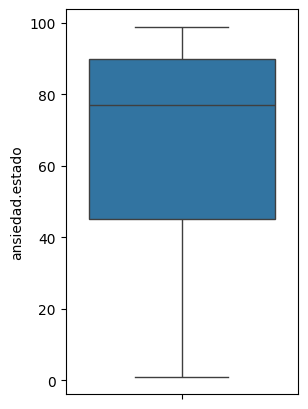

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df,y='ansiedad.estado',ax=ax)

#### Diagnosed
have you been diagnosed with an anxiety disorder? binary (si, no)


<Axes: xlabel='ansiedad.medicada', ylabel='count'>

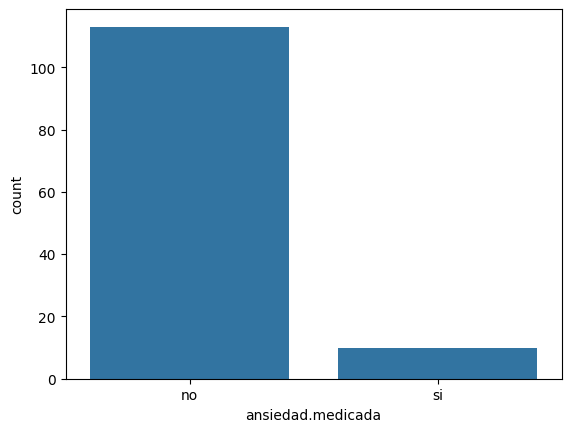

In [27]:
# plot the counts using seaborn
fig, ax = plt.subplots()
sns.countplot(data=df,x='ansiedad.medicada')

#### Relationships between outcomes

Text(0, 0.5, 'ansiedad.estado')

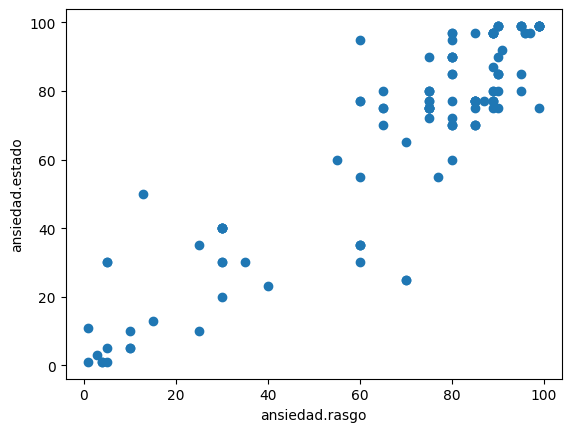

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['ansiedad.rasgo'],df['ansiedad.estado'])
ax.set_xlabel('ansiedad.rasgo')
ax.set_ylabel('ansiedad.estado')


<Axes: xlabel='ansiedad.rasgo', ylabel='ansiedad.estado'>

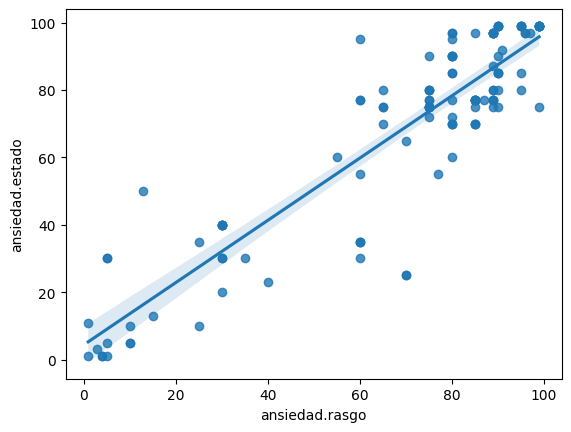

In [29]:
sns.regplot(data=df,x='ansiedad.rasgo',y='ansiedad.estado')

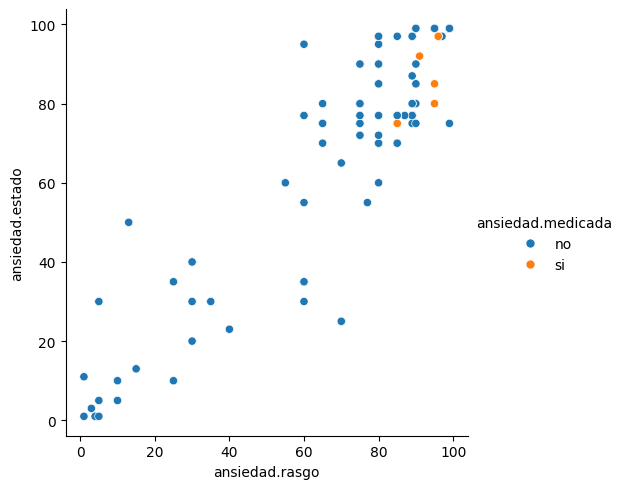

In [30]:
sns.relplot(data=df,x='ansiedad.rasgo',y='ansiedad.estado',hue='ansiedad.medicada')

#### Relationships between explanatory and outcome variables

<Axes: xlabel='ansiedad.medicada', ylabel='Edad'>

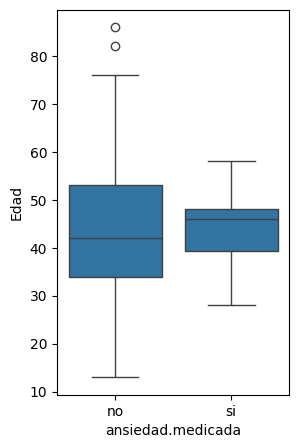

In [31]:
# Trait by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='ansiedad.medicada', y='Edad',ax=ax)

<Axes: xlabel='Sexo', ylabel='ansiedad.estado'>

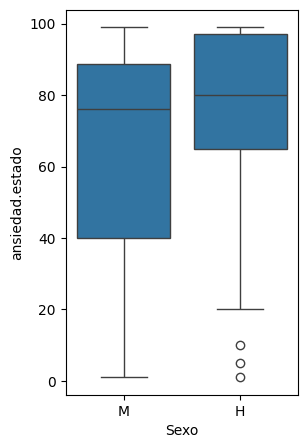

In [32]:
# State by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='Sexo', y='ansiedad.estado', ax=ax)

<Axes: xlabel='Sexo', ylabel='ansiedad.estado'>

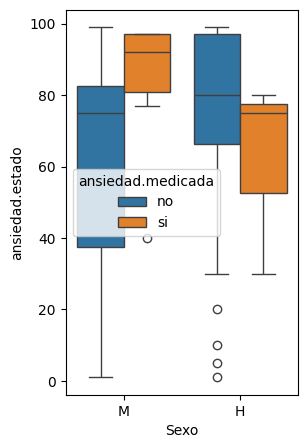

In [33]:
# Diagnosed by sex
# State by sex
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.boxplot(data=df, x='Sexo', y='ansiedad.estado', hue='ansiedad.medicada', ax=ax)

<Axes: xlabel='ansiedad.medicada', ylabel='proportion'>

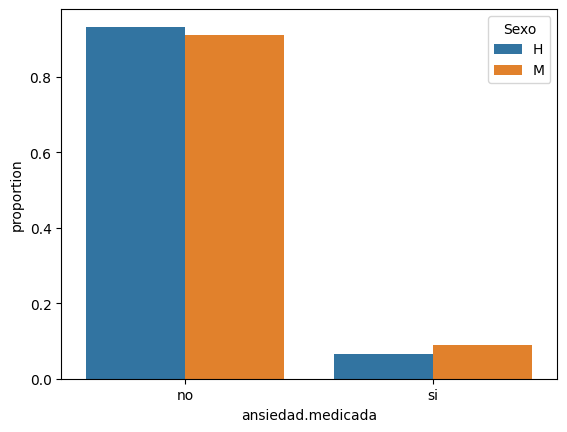

In [34]:
# plot the percentages using seaborn

x, y, hue = "ansiedad.medicada", "proportion", "Sexo"
hue_order = ["M", "H"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [35]:
#conditional frequencies by sex
pd.crosstab(df['Sexo'],df['ansiedad.medicada'],normalize='index')


ansiedad.medicada,no,si
Sexo,,
H,0.933333,0.066667
M,0.910256,0.089744


<Axes: xlabel='Edad', ylabel='ansiedad.rasgo'>

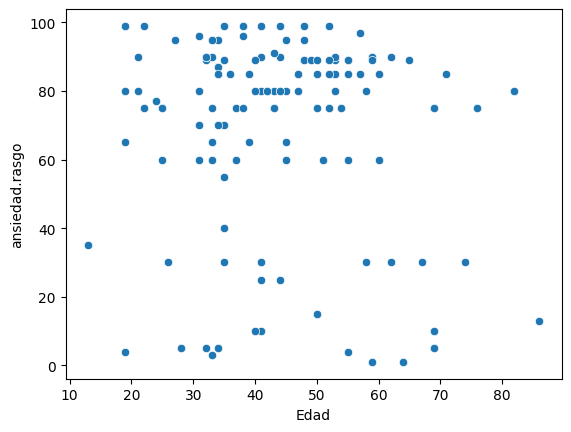

In [36]:
#Trait Vs age
sns.scatterplot(x=df['Edad'], y=df['ansiedad.rasgo'])

<Axes: xlabel='Edad', ylabel='ansiedad.estado'>

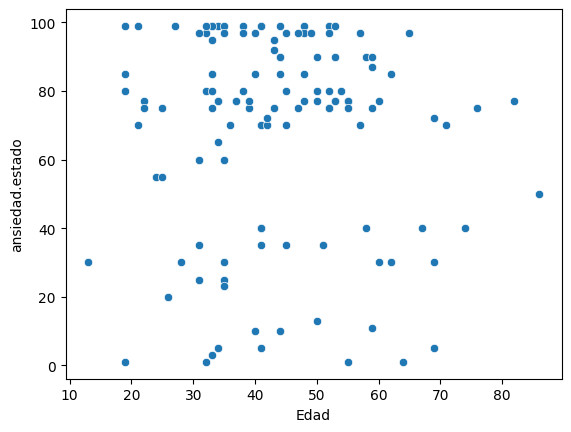

In [37]:
#State Vs age
sns.scatterplot(x=df['Edad'], y=df['ansiedad.estado'])

<Axes: xlabel='ansiedad.medicada', ylabel='Edad'>

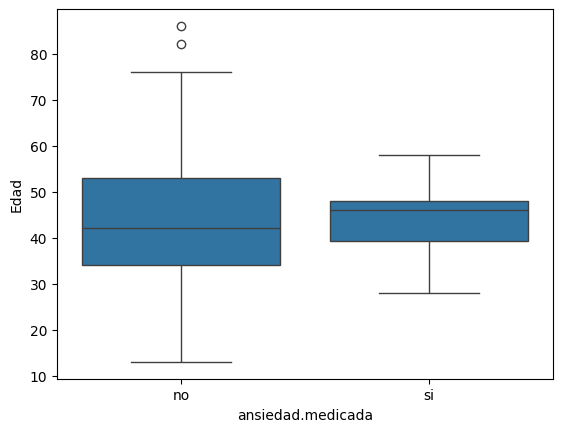

In [38]:
#age by diagnosis
sns.boxplot(data=df,y='Edad',x='ansiedad.medicada')